### THỰC HIỆN MÃ HOÁ DES DỮ LIỆU TRUYỀN THÔNG VỚI ĐẦU VÀO VÀ ĐẦU RA LÀ HÌNH ẢNH 

#### Giả sử yêu cầu: Cần truyền 1 ảnh "input.jpg'' (không làm mất đi màu sắc ảnh gốc), trước khi truyền cần mã hoá DES .Mã hoá bằng cách chuyển ảnh về dạng text (string) , mã hoá DES dạng text đó rồi lưu vào file Transport.txt và truyền đi . Phía nhận sẽ đọc file truyền đến ,giải mã DES và khôi phục từ dạng text trở về dạng ảnh và  lưu với tên :"output.jpeg"

 

    BỨC ẢNH CẦN MÃ HOÁ :



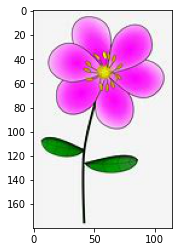

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('input.jpg')
print(" \n\n    BỨC ẢNH CẦN MÃ HOÁ :\n")
plt.imshow(mpimg.imread('input.jpg'))

In [59]:
# Sử dụng một số hàm cần thiết trong thư viện Base64 của Python chuyển đổi ảnh về dạng text
import base64
  
with open("input.jpg", "rb") as image2string:
    converted_string = base64.b64encode(image2string.read())
print(" Hình ảnh ban đầu được đưa về dạng text và lưu nó trong file encode.bin : \n\n")
print(converted_string)
  
with open('encode.bin', "wb") as file:
    file.write(converted_string)

 Hình ảnh ban đầu được đưa về dạng text và lưu nó trong file encode.bin : 


b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC0AHMDASIAAhEBAxEB/8QAGwABAAMBAQEBAAAAAAAAAAAAAAQFBgcDAgH/xABGEAACAQMDAQUDCAUICwEAAAABAgMABBEFEiExBhNBUXEiYYEUMkJScpGhsSMkkqLhBxUzQ1Nic4IWJTVjdZOjpLK0wfD/xAAbAQABBQEBAAAAAAAAAAAAAAAAAQMEBQYCB//EADARAAICAQMCBAMHBQAAAAAAAAABAgMEBREhEjETQVFhInGBBhUykaGx0RRCssHw/9oADAMBAAIRAxEAPwDqpzk05oeppQA5pzSnORQB8TTQwRvLPKkUSfOeRgqjJwBk+J8KgHWbUn9Hb30i/WWFYwfQXDo37tVtxP8AK5mu2OYkeRLFeqpGpKGYD6z8nPguB57ojXGD1qzx8F2x6pMuMXTXdHqkzQJq1gxAlaW3JOB8rjaNM+Xe8xfv1P5rLQ3QOQcEHgg9CPSptnP8jkhjU/qM7rEEPS1mc4Tu/JGPskdASCMAmmsjDlVyhnJwJU8ovOac0qBdapaWztCoe4uF+fFBtxGSMjvZHIRfDjJPPSoSi5PZFfGLk9orcn805qjOtXmRi0tNv1TdSlv2hDj92plnqlvdOIXRoLkglY5CrLIFGSYZF4OOpGAfHGOadnRZBbyiOzxra11Sjsiw5pzSlMjA5pSlAA9TSh6mlACvw7sPt+dtbb9racVCvNSgt

In [37]:
# Ma trận hoán vị khởi tạo ban đầu
PI = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

# Ma trận PC_1 hoán vị và nén Key 64 bit -> 56 bit
CP_1 = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

# Ma trận PC_2 hoán vị và nén key 56 bit xuống 48 bit
CP_2 = [14, 17, 11, 24, 1, 5, 3, 28,
        15, 6, 21, 10, 23, 19, 12, 4,
        26, 8, 16, 7, 27, 20, 13, 2,
        41, 52, 31, 37, 47, 55, 30, 40,
        51, 45, 33, 48, 44, 49, 39, 56,
        34, 53, 46, 42, 50, 36, 29, 32]

#Ma trận Expand mở rộng khối Ri từ 32 lên 48 bit
E = [32, 1, 2, 3, 4, 5,
     4, 5, 6, 7, 8, 9,
     8, 9, 10, 11, 12, 13,
     12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21,
     20, 21, 22, 23, 24, 25,
     24, 25, 26, 27, 28, 29,
     28, 29, 30, 31, 32, 1]

# Khối S_boxes
S_BOX = [
         
[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
 [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
 [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
 [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
],

[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
 [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
 [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
 [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
],

[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
 [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
 [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
 [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
],

[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
 [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
 [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
 [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
],  

[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
 [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
 [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
 [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
], 

[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
 [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
 [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
 [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
], 

[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
 [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
 [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
 [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
],
   
[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
 [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
 [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
 [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
]
]


#Ma trận P hoán vị 32 bit đầu ra sau khối S-boxes
P = [16, 7, 20, 21, 29, 12, 28, 17,
     1, 15, 23, 26, 5, 18, 31, 10,
     2, 8, 24, 14, 32, 27, 3, 9,
     19, 13, 30, 6, 22, 11, 4, 25]

#Ma trận hoán vị  nghịch đảo với hoán vị khởi tạo IP
PI_1 = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]
#Ma trận dịch Key với tương ứng dịch 1 bit tại vòng 1,2,9,16 và 2 bit tại các vòng còn lại
SHIFT = [1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1]

def string_to_bit_array(text):#Hàm đổi văn bản dạng text sang nhị phân
    array = list()
    for char in text:
        binval = binvalue(char, 8)
        array.extend([int(x) for x in list(binval)]) 
    return array

def bit_array_to_string(array): # Hàm đôi nhị phân về dạng text
    res = ''.join([chr(int(y,2)) for y in [''.join([str(x) for x in _bytes]) for _bytes in  nsplit(array,8)]])   
    return res

def binvalue(val, bitsize): # Trả về giá trị nhị phân với 1 chuỗi có kích thức đã cho
    binval = bin(val)[2:] if isinstance(val, int) else bin(ord(val))[2:]
    if len(binval) > bitsize:
        raise "binary value larger than the expected size"
    while len(binval) < bitsize:
        binval = "0"+binval 
    return binval

def nsplit(s, n):#Hàm chia thành các khối có kích thước n
    return [s[k:k+n] for k in range(0, len(s), n)]

ENCRYPT=1    #Mã hoá đặt const =1
DECRYPT=0    # Giải mã đặt const =0

# Class des sẽ chứa các hàm cần thiết để mã hoá DES
class des():
    def __init__(self):
        self.password = None
        self.text = None
        self.keys = list()
        
    def run(self, key, text, action=ENCRYPT, padding=False):
        if len(key) < 8:
            raise "Key Should be 8 bytes long"
        elif len(key) > 8:
            key = key[:8] # Nếu key lớn hơn 8 byte từ sẽ cắt còn 8 byte (64 key)
        
        self.password = key
        self.text = text
        
        if padding and action==ENCRYPT:
            self.addPadding()
        elif len(self.text) % 8 != 0:# Kích thước đã định sẽ là bội số của 8 byte
            raise "Data size should be multiple of 8"
        
        self.generatekeys()# Quá trình tạo key
        text_blocks = nsplit(self.text, 8) #Chia các đoạn text thành các khối 64 bit
        result = list()
        for block in text_blocks:
            block = string_to_bit_array(block)#Chuyển đổi sang dãy bit 
            block = self.permut(block,PI)#Thực hiện hoán vị khởi tạo
            g, d = nsplit(block, 32)#g(LEFT), d(RIGHT)
            tmp = None
            for i in range(16):  #Bắt đầu 16 vòng thuật toán
                d_e = self.expand(d, E) #Mở rộng d (R0) lên 48 bit
                if action == ENCRYPT:
                    tmp = self.xor(self.keys[i], d_e)#Xor với Key(48bit)
                else:
                    tmp = self.xor(self.keys[15-i], d_e)##Bắt đầu giải mã sau kết thúc việc sinh khoá
                tmp = self.substitute(tmp) 
                tmp = self.permut(tmp, P)
                tmp = self.xor(g, tmp)
                g = d
                d = tmp
            result += self.permut(d+g, PI_1) #Thực hiện hoán vị cuối cùng
        final_res = bit_array_to_string(result)
        if padding and action==DECRYPT:
            return self.removePadding(final_res)  #Loại bỏ các bit được padding 
        else:
            return final_res  #Trả về kết quả ciphered/deciphered
    
    def substitute(self, d_e):#Thay thế cac byte dùng Sboxes
        subblocks = nsplit(d_e, 6)
        result = list()
        for i in range(len(subblocks)): 
            block = subblocks[i]
            row = int(str(block[0])+str(block[5]),2)
            column = int(''.join([str(x) for x in block[1:][:-1]]),2)
            val = S_BOX[i][row][column] 
            bin = binvalue(val, 4)
            result += [int(x) for x in bin]
        return result
        
    def permut(self, block, table):#Hoán vị các bit trong khối dùng bảng đã cho
        return [block[x-1] for x in table]
    
    def expand(self, block, table):#Mở rộng các khối dùng bảng cho trước
        return [block[x-1] for x in table]
    
    def xor(self, t1, t2):#Thưc hiện phép XOR 2 khối và trả về kết quả
        return [x^y for x,y in zip(t1,t2)]
    
    def generatekeys(self):#Hàm mô tả lại thuạt toán sinh Key
        self.keys = []
        key = string_to_bit_array(self.password)
        key = self.permut(key, CP_1) #Thực hiện cho key 64 bit qua khối PC_1 thành khối 56 bit
        g, d = nsplit(key, 28) #Chia thành 2 khối 28 bit (g->LEFT),(d->RIGHT)
        for i in range(16):#Ap
            g, d = self.shift(g, d, SHIFT[i]) #Dịch trái xoay vòng
            tmp = g + d 
            self.keys.append(self.permut(tmp, CP_2)) # Qua PC_2 thành Key Ki 48 bit

    def shift(self, g, d, n): #Hàm dịch trái xoay vòng
        return g[n:] + g[:n], d[n:] + d[:n]
    
    def addPadding(self):#Padding bit 0 vào các khối <64 bit
        pad_len = 8 - (len(self.text) % 8)
        self.text += pad_len * chr(pad_len)
    
    def removePadding(self, data):#Loại bỏ các padding thừa khi giải mã xong (it assume there is padding)
        pad_len = ord(data[-1])
        return data[:-pad_len]
    
    def encrypt(self, key, text, padding=True):
        return self.run(key, text, ENCRYPT, padding)
    
    def decrypt(self, key, text, padding=True):
        return self.run(key, text, DECRYPT, padding)


# dữ liệu mã hoá DES đầu vào plaintext chính là converted_string trong file encode.bin phía trên.    
plaintext= converted_string="b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC0AHMDASIAAhEBAxEB/8QAGwABAAMBAQEBAAAAAAAAAAAAAAQFBgcDAgH/xABGEAACAQMDAQUDCAUICwEAAAABAgMABBEFEiExBhNBUXEiYYEUMkJScpGhsSMkkqLhBxUzQ1Nic4IWJTVjdZOjpLK0wfD/xAAbAQABBQEBAAAAAAAAAAAAAAAAAQMEBQYCB//EADARAAICAQMCBAMHBQAAAAAAAAABAgMEBREhEjETQVFhInGBBhUykaGx0RRCssHw/9oADAMBAAIRAxEAPwDqpzk05oeppQA5pzSnORQB8TTQwRvLPKkUSfOeRgqjJwBk+J8KgHWbUn9Hb30i/WWFYwfQXDo37tVtxP8AK5mu2OYkeRLFeqpGpKGYD6z8nPguB57ojXGD1qzx8F2x6pMuMXTXdHqkzQJq1gxAlaW3JOB8rjaNM+Xe8xfv1P5rLQ3QOQcEHgg9CPSptnP8jkhjU/qM7rEEPS1mc4Tu/JGPskdASCMAmmsjDlVyhnJwJU8ovOac0qBdapaWztCoe4uF+fFBtxGSMjvZHIRfDjJPPSoSi5PZFfGLk9orcn805qjOtXmRi0tNv1TdSlv2hDj92plnqlvdOIXRoLkglY5CrLIFGSYZF4OOpGAfHGOadnRZBbyiOzxra11Sjsiw5pzSlMjA5pSlAA9TSh6mlACvw7sPt+dtbb9racVCvNSgtWMKq090AGMMZCiNW6NNIeFB8OpPgDjirfWdVByPkEYzkJ3M0uPcXMqZ/ZFP149lv4ESasW278EdyICBZWOOnyW3x/y1qpnlKk1KN3NHEsUkSOibgr224MqliQpikJOAOOHJ46VV3EiSe2jBlJIyPMdQR1z5itbgw/tktmbjTa9vgmtme8V0QRzVsk3f29xFnmSFwp8Q+Mqw9Dg/CsvvwasrK4IYAn4+6pmViqUSfm4SnBmp1DVnMFnHbuUmu7SG7nlX50EMq5ATPG9uQvkAT1xnPSXSRKI4wFVc4Az1JySSecnqTURLmR7S3mYFXmhgbaeqxrEsUa/BQtQJZTk81B0zT4xgpNcsrtH0uMa1OS5ZZfLWz1NSY5u9AXeysCrxuvzo5FOVkU+YPI/jVCkhJqxtWO4fCrK/Gj0tNFvk4cOhpo3+nXTXtnbXDALKQ0c6r81ZomMcgHuyDj3GpdUvZ4t8n1Bforfvt/zW8Dn8Sauq8/th0WSivJnl98FXZKC8mxSlKbGQepqJqFzJbW4MWPlE8i29vuGVWRgWLsPEKAzEeOMeNSz1NVWqg99pbH5m67QeXeNEGX8A9d1xUpJMcqipTUWVEm2FSiljlmd3c7nkduWeRvFj4/w4qbi4IJ5qyus+1VFchsmtphVx2SPQdPqjskfJujnrX48az5dCEnwOT8yTHRZAPwPUfgYLCTd7qkwlg3DdF4HUA9cOAM4Pn4VNzpQxaXc02l6Ld/Pb27v2LfKrhVX1+noR+7uHFyQmHtsGeI/0iJgHf5FfePX0ldyf5vtbmGU95L8vhmDYKpNEhkjAxzgrgn+NS7i1jvbVZom2zLEwidW2h0Ye1E7DwP4H4hq6Oyuo3sXuVMcPfRrK5J24VhKxbHhhTn1xWV1TMt8N1yy1XLfqjwuU010v1W73T78c77blTflynVKMrNmuV7rtt+vBLnwuyFQcRoEB4x7CqCPhkf8A4VBkQk1bPCQjTyKwMruYo8e0quxcA/3j1by6eHPilu0q7wuF9rnqMA/OB8qvNN1BNeFa118tJeUd9ot/Tb67+hMwsyMYqMnz/ryIMURGOKtbZBGveMrHlQFRcu7sdqogHVieB614K1up2x/p3zjEZHdqf70vzfuyfdVnZxw7o5p5GM6EmEwSSQrbkqVJi2ENkgkEk/AA4qRl5UpRfhrcbzsyUoPwlv8AsavSrSSzsoopcd/Iz3Fzt5AmlO4qD5Lwo+z76nVSQ397DgszXkH0lKoLtB5oygK/oQD7yeDbxSxTxxzQurxSKHRl6MD68+tYa2E4y+Pueb3V2Qm/E7s9KUpTQyD1NR7u2W7gaItsfKyQyAbjHKhyr48R4EZ5BI8akHqaULgVPblGUmD73gmTurpBl4s5DL07yJj85D4H4HBGBVz2+SeK1etyW4to4nijlnmcra94ue5ZRl58ghhtHkRkkDIzkZOaW4gwEuDIFAH62iyMSPEtHsb8TWl0/ItsXC7Gu0rKusjxHsRDanPSvRbJiDsYJyWBKg7WP0lOQfxx7vPwkvr0k4khT/CgGf8Aqsw/CvDvpnbLzSOf97tcD7KkbR8BU/PxrcqnZ1qTTTSb259U1vs/c0F1V98NnD83/BZK8EE6Zmt3d2AkW2WX2vNnCs0eR59fvq2mntBa7/YGE3c4JBIGc4G31yPyrPwhAkqoqK8qsm8gDBk9nJ2+HPhX087d5u2YVJWiZDjHcqpgbPmGY59PSvO9e+zf9bmQnbaoS2Ta7+aXD+b27eZn8jCn4ijJ8/8AIXD3+8CcRv8A2ZRN+zPVRG/sZ467ST+FQ5nMuDNJJMOo71iyfBBhP3a+0bu4oonZmtlSOROu+EYKgZHJVSDjxGB4D2UkOANuCpGVIOQQecg1t9Cri058ODS23XxccPf67+6LjTKq925JfXueAnxgeXSpcNywI54qEYTnNe0aEYrV2Rg0aCyFbiaO0uidvNXmly7bm6gH9HNEL1F8FlD91Lj7WUb1JPjWXtFYba0ejI0l1dz/ANXbwpZqfAyuwmkA+yBGPUnyrIarCEYtowmtVwjFtF7SlKzhkweppQ9TSgDOa25N+AScRWMWweRmllLY9dq/dWXunJY1qtdiZbq2m+hcW5t8+UsLNKq/EMxH2TWYuYmyTitdo7j4SN1oMo+Cvr+5Uys3Nfke49akNFz0r6SLGT0AGSTwAB4k1pvEiomwdsVE+gXCFVH6SUiKPP1m8T6DLH0r5m3KWG8nd88tjc2H7zPGB168V6aa4ur7V07shdNitIoywwWkulaZ3APhgKB8fOvy5QhmGPOqaNePm2Oc4qW3C+jT/wAkn9EU9E6cu1y7pcfk/wCV+hHSQBiRwScnHialR70R2hUOBlzbk4Vz1PdnnDH0wfLJzVeFYNVhakh1qxyKY9PHBPy6YuHBNa2hHdGQGLvVV4jNhUlRgGDRSZ7tgfcx+HSvdbFVG4lQoGSxIAx5knitDoDLJZXVpIqslvdOqo4DL3UyrOBtPGAWYD0qwGmaQrB10+xDdci2hzn9mslPVba265rdows9bvqk65rdrgzdnaT3hCWXEecSXhXdBGPHus8O/kBkDxPG1tTbW8FpBFbwKVjiBC5JZiSSzMzHksSSSfEmvby9wwPcKVUX5E73vIo8nLsyZbzFKUqORAeppQ9TSgDwurWC8heCYNtYqyshw8bqcrIjeBB6cfeDg5q60rU4iQ1ublB0ms9m5h/fgdgwPoWH5DWUqRRk2UPeDJWNl24z3rZhhpepStiPTbvPnOI4EHq0rg/cpq1tOztvDm51eSKSOEGZrePd8kQR5ctMzAM+MdCAPcetaSs721u5LXszrIh5uL6OPS7ZR1eS9kFuQvvwWPwqRdqN9selvZexKv1XJuj0t7L2M92cgea0fWJlZZ+00uoaq4b6IS6ZI0HuCsCP4V6Xlqck4rWjSo4tM07T4GVH02C3jtHIJVXgjEXtAc7WGQ3r5iquRFlcwyIYbpRl4JMb8fWjPRl8iPwPAl6bl+Eulk7SM7wV0NmSaBgTxUq2hbcDiraSy5PFBCIe7GxnlkbZBCnMkz/VQfmegHJwBWhszo9BqbdRi4btlt2fUg6s30e9tI/8yQ7z/wCQq9qHp1o1laRxOVaZ2ee5dM7WmkOW2552jhV9yiplYi6fiWOXqed5Fni2ymvNilKU0MClKUAD1NACegJ9BUXUZrm3sNTuLVI3uYLS4mgSUMUaSNCwDBSCR7s1x651XtJcytLPrmqh2G/9BdSW8QOfoJblUA+FR78iFH4iJk5deNt1+Z2ulcZtu0nbOwbMGsS3MYwxi1FUukbB6F3/AEv3OK0unfykW+5Itc0+S1JIBurHdPb5z1eI/pQPQvXNWXVb2ZzTnU3cRfJ0Gsr2kHy3XOwOk43IdSudbuB9VdNh3R7vcSxFaGyv9O1KBbmwure6gb+st3VwpxnawHIPmCAaz0H65281eX6Oi9n7Kxx4LNfTG5Leu0YqSyYzVV5T29tcp3dxDHKgO4CRQdreanqD7wa9aUopXNpFmfmzX6L9VbuRh8DJub8a97awsbRmeGL9K42vNIzyzMv1TJIS2PdnHuqVSunKTWzZ25ya2bFKUrk4FKUoAUpSgB4mue692QuoZZrrSYzNbSEu9qn9NATziIH5yeQHI6YPUdCPU0pi+iF8emZGycavJh0TOFOhWR0kRkkU7WR1KSLj6ysA34V4ugbAOfPnngetd0ubOwvAFu7W2uFHQXEUcuPTeDUD/Rrstu3fzPYZ/wAIY+7OPwqs+7JJ/DIp/ueSfwz4+Rxizi1GG8jfRZryPUWOIxp+4zSc9GROCvnuGPOuj9gxqkz9sb7VmR9Tk1lLC8dAgUyWFukRA7v2eM444rYWtpY2YEdpa29uhYZW2ijiU8+IQCud6P2u0XQYNbivItQmu7ztFrt6kdrbEh1Nx3e7vZSsfUYOGOPzsaanTH4pblrj0uiO05bnSqVzC7/lJ1iXjTdHtrccjvNQllnY+/u4gij9s1RT9pe2d+SJ9cuIY8nCWCx2oHnhoVEn3vSTy6oeYlmdTDu9ztuDzwePPgfjXmJYWbassRbyEiE/cDmuDSW4uTuurm6uZGOC1zNPM3PU5cmvoadpwBItgSASMIAePecUwtQrk+EyNHVKpPhM70cjqMetK5T2UuNcttV0yzsbmWS0nlzd2txI80C2yjdJLGpJ2kcbSCOSAQc4rq1Ta7FYt0WFNsbY9URSlKcHhSlKAB6mlD1NKAFKUoA/R1X7Q/OsL2a0jTNa7P3cV9Dv/wBfa5LDKh2zwObkgtE+OPeOQfEGt0Oq/aH51lewv+w5/wDjOtf+01I0nwzmSUlsygvuwerRMzWFzb3UXJVZ/wBXnA8uhjP3r6VTt2Z7TwsQ+lXRB5zEYpRnx5ic12ClQJ6fTLtwVlmlY8+26+RyJOzvaWT2V0q858XVIwD6ysBVtZ9jNenKG6e1sk43Zf5TN/lSLCfv10elJXp9UPVhVpVFfqyr0jRNN0aJ1tVZppcd/cTENNLg5wSAAFHgAAPjybSlKsElFbIs4xUVshSlKU6FKUoAHqaUPU0oAUpSgD9HVftD86yvYbjRrxfq65ra/wDcmtUOq/aH51lexPGn60n9n2l11PunBpBDU0pSlFFKUoAUpSgBSlKAFKUoAHqaUPU0oAUpSgD9HVfUfnWV7G+zH2vj/su2GvKPQvG1amst2SIW67fRZ5XtbqEnHlLHG3/ykfcR9zU0pSlFFKUoAUpSgBSlKAFKUoA/SOTTFKUAMUxSlADFfIVBuIVQWO5sADcfM48aUoA+sUxSlADFMUpQAxTFKUAMUxSlADFKUoA//9k='"
   

In [51]:
#Hàm main     

if __name__ == '__main__':
    key = "Nhom__07"                                 #key = "Nhom__07"
    
    d = des()
    r = d.encrypt(key,plaintext)          
              
    print("Dữ liệu được mã hoá DES và lưu vào file Transport.txt và truyền thông đi:\n\n\n %r" % r)
    print("\n \n\ \n")

with open("Transport.txt", "w",encoding="utf-8") as file:    
    file.writelines(r)

Dữ liệu được mã hoá DES và lưu vào file Transport.txt và truyền thông đi:


 '"\x1e¸\x999àÎJ\x1a~SzyLG\x92ÔFRÄîÅ\x08\x15:F«\xadõú\x9e\x0c\x87fDõ\x08WÊU\x05\x99v#â.\x89H\x04ê·³ÛõÓ\x02#è\xadÎ\x03y\x1cQW¸Çb\x1a\t\x15`\x81:\x1e\x1dª\x18x¨\x9fdx~s\x01h\xa0\x17ÃÉe\x19x\x91¶\x0e\'¿tÇ\x03|ègë\xad\x19\x12bú\x95\x11ãô\x16E\x1e¸\tdV[fùAí\x00¾ðk]#®®\x8c\xa0%R¡.\x1ep\x0eQ,\x10\nÚ\x84Üûî\x0c!y\x10øf\x89î\x0c!y\x10øf\x89î\x0c!y\x10øf\x89î\x0c!y\x10øf\x89î\x0c!y\x10øf\x89î\x0c!y\x10øf\x89î\x0c!y\x10øf\x89QÛ,»¢\x10\x95e;&en\x7fq 2Ö\x8eñ©kq}ûT\x05²Ã{»Ú=Ð\x8a \x9c^f\x10\x83ÕÞP¥½â*\x92Rm\x16,è\x03<NY\xa0\x8aÂ\x1a\x03\x0b{\x14K\x91¢&öO<k"/\x8f\x02È;\x194R[\xad3\x83á,ÅBb¾UXYî]XD\rJ£ËûÅZ(\x17sQ°9£Ñîóh\x03Ç°-~\x0e¥(\x1ep´f\x96r/\x88.rÜâ\x92q±â\x804\'ß"\x12Ø\x06ðl½^\x93ôôxMk4²p]¤Ã\x0eöa\x03bù¦/3¾"¦\x10qÙ\x89^Ì Rm\x16,è\x03<N\x076J}²|\x1däbæ1\x9fÒMÕÁ\x0eº¨\x97\x0884í\x0e\x1e,ùËö}\x15Rm\x16,è\x03<N\xad«©M\x00\x8aHü0j\x18`°,5ã\n\x97\x8ex\x08Z©Î\x04ÏÎéV\x82,ú»\x9d\xa0µtÔ\x1f\x82\x05ú\x11\x19\x17ð\x022/KmÉ\x96Þ-Æ\x

In [52]:
# Đọc dữ liệu trong file Transport.txt truyền đến và tiến hành giải mã
with open("Transport.txt", "r+",encoding="utf-8") as file:    
    p =file.read()  
    r2 = d.decrypt(key,p)        # Giải mã dữ liệu
print("Giải mã dữ liệu trong file Transport.txt và ghi vào file Output.txt : \n\n\n ", r2)
with open("Output.txt", "w",encoding="utf-8") as file:    
    file.writelines(r2)

Giải mã dữ liệu trong file Transport.txt và ghi vào file Output.txt : 


  b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAsJCQcJCQcJCQkJCwkJCQkJCQsJCwsMCwsLDA0QDBEODQ4MEhkSJRodJR0ZHxwpKRYlNzU2GioyPi0pMBk7IRP/2wBDAQcICAsJCxULCxUsHRkdLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCz/wAARCAC0AHMDASIAAhEBAxEB/8QAGwABAAMBAQEBAAAAAAAAAAAAAAQFBgcDAgH/xABGEAACAQMDAQUDCAUICwEAAAÏÎ¡lèEFEiExBhNBUXEiYYEUMkJScpGhsSMkkqLhBxUzQ1Nic4IWJTVjdZOjpLK0wfD/xAAbAQABBQEBAAAAAAAAAAAAAAAAAQMEBQYCB//EADARAAICAQMCBAMHBQAAAAAAAAABAgMEBREhEjETQVFhInGBBhUykaGx0RRCssHw/9oADAMBAAIRAxEAPwDqpzk05oeppQA5pzSnORQB8TTQwRvLPKkUSfOeRgqjJwBk+J8KgHWbUn9Hb30i/WWFYwfQXDo37tVtxP8AK5mu2OYkeRLFeqpGpKGYD6z8nPguB57ojXGD1qzx8F2x6pMuMXTXdHqkzQJq1gxAlaW3JOB8rjaNM+Xe8xfv1P5rLQ3QOQcEHgg9CPSptnP8jkhjU/qM7rEEPS1mc4Tu/JGPskdASCMAmmsjDlVyhnJwJU8ovOac0qBdapaWztCoe4uF+fFBtxGSMjvZHIRfDjJPPSoSi5PZFfGLk9orcn805qjOtXmRi0tNv1TdSlv2hDñ¦è¯U%vdOIXRoLkglY5CrLIFGSYZF4OOpGAfHGOadnRZBbyiOzxra11Sjsiw5pzSlMjA5pSlAA9TSh6mlACvw7sPt+dtbb9racVCvNSgtWM

 

 ẢNH KHÔI PHỤC TỪ DẠNG TEXT TRONG FILE OUTPUT.TXT


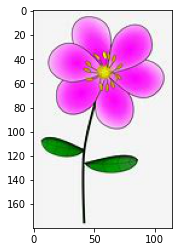

In [58]:
file = open('encode.bin', 'rb') 
# Output.txt có lỗi nhảy dòng do UTF-8 ,nên dùng tạm file encode để minh hoạ việc đổi text về ảnh 
output = file.read()
file.close()
decodeit = open('output.jpeg', 'wb') #lưu vào ảnh và đặt tên output.jpeg
decodeit.write(base64.b64decode((output)))
decodeit.close()
print(" \n\n ẢNH KHÔI PHỤC TỪ DẠNG TEXT TRONG FILE OUTPUT.TXT")
plt.imshow(mpimg.imread('output.jpeg'))

( Nhóm 07 hiện tại vẫn còn một số về code chưa khắc phục được tại phần DES cho hình ảnh này )

_________Kết thúc ___________